<h3 style='color:purple' align='center'>Random Forest Python Tutorial</h3>

**Digits dataset from sklearn**

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_excel('mun.xlsx')
df=df.drop(['date','longitude','latitude','sunset','sunrise'],axis=1)
df2 = pd.read_excel('Fix.xlsx')
df2=df2.drop([0])
df2


,วันที่เก็บข้อมูล,พื้นที่สำรวจ,Unnamed: 2,Unnamed: 3,พิกัดภูมิศาสตร์,Unnamed: 5,พันธุ์มันสำปะหลัง,อายุ (เดือน),โรคพุ่มแจ้,โรคใบด่าง,Unnamed: 10,โรคใบไหม้,Unnamed: 12,โรคแอนแทรคโนส,Unnamed: 14,โรคใบจุดสีน้ำตาล,Unnamed: 16,โรครากเน่า โคนเน่า,Unnamed: 18
1,2022-05-31,ระยอง,เมือง,ห้วยโป่ง,12.680193,101.099502,ระยอง 9,12.0,0,6,5,0,0,0,0,100,2,0,0
2,2022-06-08,ระยอง,เมือง,ห้วยโป่ง,12.725235,101.132818,ระยอง 9,4.0,7,0,0,0,0,0,0,100,2,0,0
3,2022-06-08,ระยอง,เมือง,ห้วยโป่ง,12.721843,101.105134,ระยอง 9,5.0,1,0,0,0,0,0,0,100,2,0,0
4,2023-09-06,ระยอง,เมือง,ห้วยโป่ง,12.722262,101.132949,ระยอง 9,4.0,0,0,0,,0,0,0,0,0,0,0
5,2023-09-06,ระยอง,เมือง,ห้วยโป่ง,12.709117,101.122987,ระยอง 9,5.0,0,0,0,0,0,0,0,70,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2023-09-13,ฉะเชิงเทรา,แปลงยาว,แปลงยาว,13.569677,101.326105,ระยอง 9,5.0,0,95,5,0,0,0,0,0,0,0,0
227,2023-09-13,ฉะเชิงเทรา,แปลงยาว,หนองไม้แก่น,13.717943,101.411067,ระยอง 9,5.0,0,0,0,0,0,0,0,20,2,0,0
228,2023-09-13,ฉะเชิงเทรา,แปลงยาว,หนองไม้แก่น,13.508858,101.337375,ระยอง 5,8.0,1,70,5,20,2,0,0,20,3,0,0
229,2023-09-13,ฉะเชิงเทรา,แปลงยาว,หนองไม้แก่น,13.534933,101.368851,ห้วยบง 60,3.0,0,60,5,0,0,0,0,30,2,0,0


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

**Train and the model and prediction**

In [4]:
X = df.iloc[:,lambda df: [0,2,5,6,7,9,11]]
y = df2.iloc[:,-4].values

In [5]:
X.values.reshape(-1, 1)
X.iloc[2]

uvb              110490.141480
stl1                303.714852
d2m                  25.099450
minTemp              28.691309
meanTemp             30.252224
RH                    0.740049
durationOfDay        12.850556
Name: 2, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit( X_train.astype(float),y_train)

RandomForestRegressor()

In [8]:
y_pre = model.predict(X_test)

In [9]:
from sklearn.metrics import  mean_squared_error  ,mean_absolute_error
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pre))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pre))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pre)))


Mean Absolute Error (MAE): 18.220652173913045
Mean Squared Error (MSE): 731.5994630434783
Root Mean Squared Error (RMSE): 27.04809536813042


In [10]:
model.score(X_test,y_test)

0.5103734626509262

In [11]:

from sklearn.metrics import r2_score
r2_score(y_test, y_pre)

0.5103734626509262

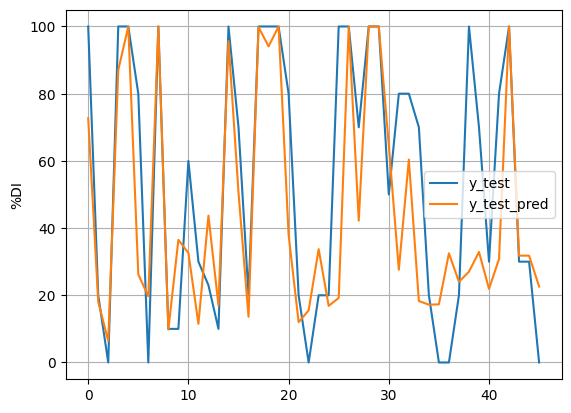

In [12]:
plt.plot(np.arange(len(y_pre)) ,y_test)
plt.plot(np.arange(len(y_pre)) , y_pre)
plt.legend(['y_test','y_test_pred'])
plt.ylabel("%DI")
plt.yticks(np.arange(0,101,20))
plt.grid()


plt.show()

In [13]:
y_test

array([100, 20, 0, 100, 100, 80, 0, 100, 10, 10, 60, 30, 23, 10, 100, 70,
       20, 100, 100, 100, 80, 20, 0, 20, 20, 100, 100, 70, 100, 100, 50,
       80, 80, 70, 20, 0, 0, 20, 100, 70, 30, 80, 100, 30, 30, 0],
      dtype=object)

In [14]:
import pickle

# save
with open('model2.pkl','wb') as f:
    pickle.dump(model,f)


In [15]:
# load
with open('model2.pkl', 'rb') as f:
    clf2 = pickle.load(f)

clf2.predict(X)

array([100.  , 100.  , 100.  ,  19.6 ,  51.  ,  99.83,  99.83,  27.03,
        17.  ,   9.8 , 100.  , 100.  , 100.  , 100.  ,  11.6 ,  32.5 ,
       100.  ,  15.3 ,  17.3 ,  97.79,  99.66, 100.  , 100.  ,  53.  ,
         5.6 ,  99.66,  99.66,   6.6 ,   6.1 ,  66.  , 100.  , 100.  ,
       100.  , 100.  ,   4.3 ,  11.7 ,  10.5 ,  42.2 ,  47.3 ,  54.3 ,
        26.9 ,  30.7 ,  87.61,  94.07,  94.07,   2.8 ,   3.04,   9.5 ,
         2.1 ,   3.74,  44.1 ,   7.7 ,   7.7 ,   7.26,  20.6 ,  18.3 ,
        20.1 ,   2.7 ,   3.2 ,  73.42,  85.41,  24.21,  18.7 ,  19.21,
        43.7 ,  75.24,  35.34,  76.34,  44.6 ,  45.5 ,  22.28,  36.97,
        50.55,  33.3 , 100.  , 100.  , 100.  , 100.  ,   8.  ,   9.85,
       100.  , 100.  , 100.  ,  62.8 , 100.  , 100.  , 100.  ,  35.4 ,
        28.5 ,  30.8 ,  95.82,  17.8 ,  17.2 ,  14.1 ,  46.9 ,  95.59,
        26.2 ,  32.9 ,  56.6 ,  19.3 ,  19.2 ,  13.6 ,   9.5 ,  23.4 ,
         9.9 ,   8.  ,  64.6 ,  16.93,  12.  ,  16.85,   9.5 ,  11.5 ,
      

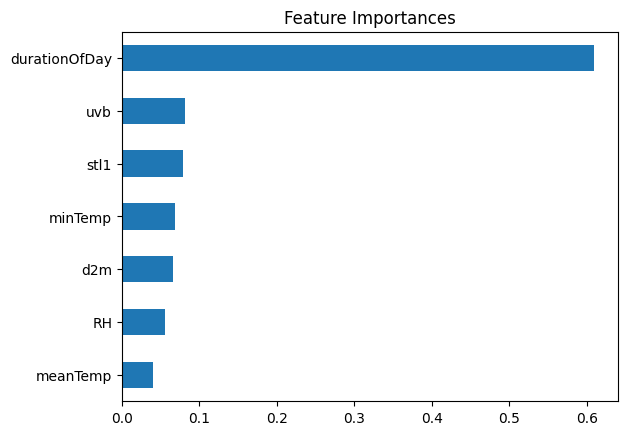

In [16]:
model_ranks = pd.Series(model.feature_importances_, index=X_train.columns, name="Importance").sort_values()
ax = model_ranks.plot(kind='barh')
plt.title("Feature Importances")
plt.show()

In [17]:
test_score = clf2.score(X_test, y_test)
print('Test Set R-squared:', test_score)

Test Set R-squared: 0.5103734626509262


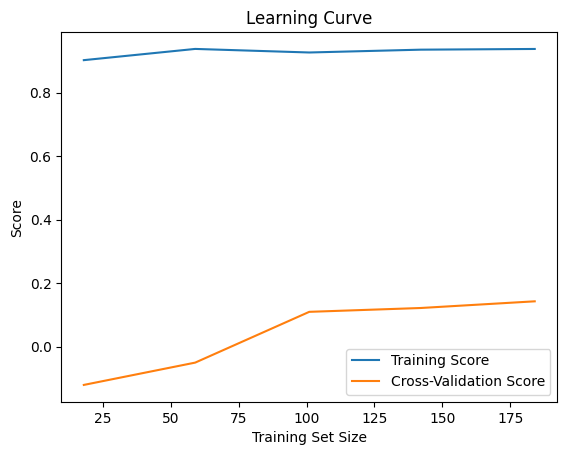

In [18]:
# Plot Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()